# Rodrigo Burberg 
# Project 8 - AIML 
# Twitter Airline Sentiment Analysis - NLP

Background and Context:

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

 
Data Description:

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

 

Dataset:

The dataset has the following columns:

* tweet_id                                                           
* airline_sentiment                                               
* airline_sentiment_confidence                               
* negativereason                                                   
* negativereason_confidence                                    
* airline                                                                    
* airline_sentiment_gold                                              
* name     
* negativereason_gold 
* retweet_count
* text
* tweet_coord
* tweet_created
* tweet_location 
* user_timezone
 

Objective:

* To implement the techniques learned as a part of the course.


Learning Outcomes:

* Basic understanding of text pre-processing.
* What to do after text pre-processing
* Bag of words
* Tf-idf
* Build the classification model.
* Evaluate the Model
 

Steps and tasks:

1. Import the libraries, load dataset, print the shape of data, data description. (4 Marks)
2. Do Exploratory data analysis(EDA) based on the below statement. (9 Marks)
      a. Plot the distribution of all tweets among each airline & plot the distribution of sentiment across all the tweets. 
      b. Plot the distribution of Sentiment of tweets for each airline & plot the distribution of all the negative reasons. 
      c. Plot the word cloud graph of tweets for positive and negative sentiment separately.
3. Understand of data columns: (3 Marks)
     a. Drop all other columns except “text” and “airline_sentiment”.
     b. Check the shape of the data.
     c. Print the first 5 rows of data.
4. Text pre-processing: Data preparation. (12 Marks)

NOTE:- Each text pre-processing step should be mentioned in the notebook separately.
     a. Html tag removal.
     b. Tokenization.
     c. Remove the numbers.
     d. Removal of Special Characters and Punctuations.
     e. Removal of stopwords
     f. Conversion to lowercase.
     g. Lemmatize or stemming.
     h. Join the words in the list to convert back to text string in the data frame. (So that each row
          contains the data in text format.)
     i. Print the first 5 rows of data after pre-processing.
     
5. Vectorization: (8 Marks)
    a. Use CountVectorizer.
    b. Use TfidfVectorizer.
6. Fit, tune(optimize the parameter to improve the accuracy)& evaluate the model using both types
    of vectorization. Print the top 40 features and plot their word cloud using both types of vectorization. (14 Marks)
7. Summarize your understanding of the application of Various Pre-processing and Vectorization and
    the performance of your model on this dataset. (6 Marks)

8. Overall notebook should have:(4 Marks)
     a. Well commented code
     b. Structure and flow

 

Best Practices for the Notebook : 

The notebook should be well-documented, with inline comments explaining the functionality of code and markdown cells containing comments on the observations and insights.
The notebook should be run from start to finish in a sequential manner before submission.
It is preferable to remove all warnings and errors before submission.
 

Submission Guidelines :

The submission should be a well-commented Jupyter notebook [format - .html and .ipynb]
Any assignment found copied/plagiarized with other groups will not be graded and will be awarded zero marks.
Please ensure timely submission as any submission post-deadline will not be accepted for evaluation
Submission will not be evaluated if,
it is submitted post-deadline, or,
more than 2 files are submitted


 ## Import the libraries, load dataset, print the shape of data, data description.

In [615]:
#IMPORTING LIBRARIES 

import os
import pandas as pd       
import bs4
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 
import wordcloud
from bs4 import BeautifulSoup
import numpy as np
import re
import nltk
import warnings
# Suppress warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import string, unicodedata
import re                                       #Natural language processing tool-kit
import matplotlib.pyplot as plt                                         # Used for plotting
import seaborn as sns     
nltk.download('stopwords')
nltk.download('punkt')
from collections import Counter
from nltk.corpus import stopwords                   #Stopwords corpus
from nltk.stem import PorterStemmer                 # Stemmer
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer 
import contractions                                     # Import contractions library.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF
from sklearn import metrics
from sklearn.metrics import confusion_matrix
!pip install vaderSentiment


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rodrigoburberg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rodrigoburberg/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [562]:
#LOAD DATA

tweets = pd.read_csv("Tweets.csv")


In [563]:
#CHECKING SHAPE OF DATA

tweets.shape

(14640, 15)

In [564]:
#CHECKING COLUMN NAMES 

tweets.columns.values

array(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'], dtype=object)

In [565]:
#THIS GIVES US AN OVERVIEW OF DATA TYPES AND NULL VALUES

tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [566]:
#PRINTS OUT 1ST 10 ROWS

tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [567]:
#SHOWS NUMBER OF UNIQUE ROWS 

#This is helpful to see that there are a total of 6 airlines that we will examine

tweets.nunique()

tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64


## Exploratory Data Analysis (EDA) 

      a. Plot the distribution of all tweets among each airline & plot the distribution of sentiment across all the tweets. 
      b. Plot the distribution of Sentiment of tweets for each airline & plot the distribution of all the negative reasons. 
      c. Plot the word cloud graph of tweets for positive and negative sentiment separately.

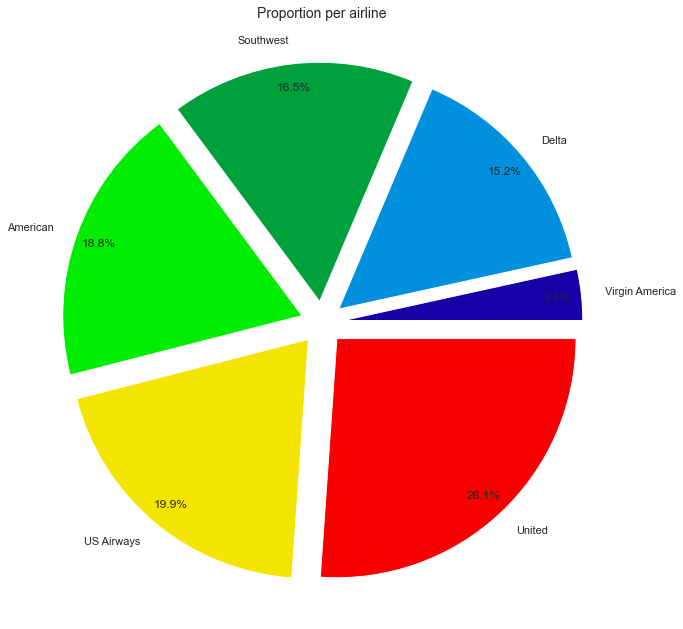

In [568]:
#THIS PRINTS OUR THE PROPORTION OF TWEETS PER AIRLINE

Category=tweets['airline'].value_counts().sort_values()
pie, ax = plt.subplots(figsize=[20,11])
labels = Category.keys()
plt.pie(x=Category, autopct="%.1f%%", explode=[0.09]*6, labels=labels, pctdistance=0.9)
plt.title("Proportion per airline", fontsize=14);
#pie.savefig("DeliveryPieChart.png")

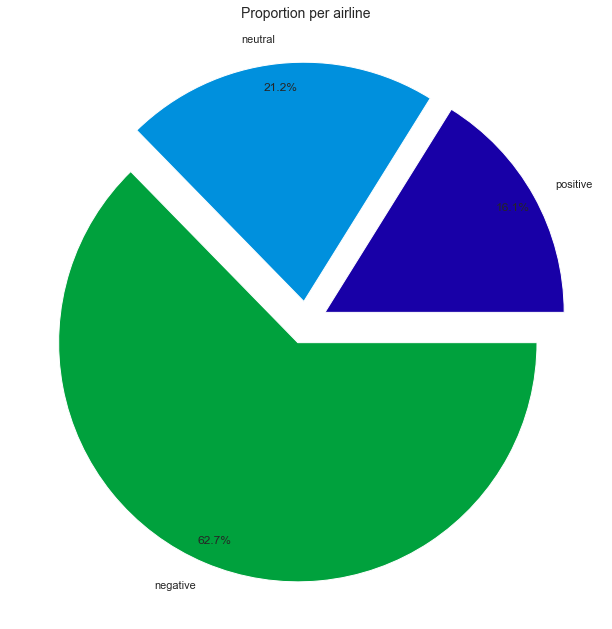

In [569]:
#Plotting Airline Sentiment

#three possible values for sentiment positive, negative, and neutral 

Category=tweets['airline_sentiment'].value_counts().sort_values()
pie, ax = plt.subplots(figsize=[20,11])
labels = Category.keys()
plt.pie(x=Category, autopct="%.1f%%", explode=[0.09]*3, labels=labels, pctdistance=0.9)
plt.title("Proportion per airline", fontsize=14);
#pie.savefig("DeliveryPieChart.png")

In [570]:

## Function to plot stacked bar chart

def stacked_plot(x):
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, tweets["airline_sentiment"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, tweets["airline_sentiment"])
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))

    plt.show()

airline_sentiment  negative  neutral  positive    All
airline                                              
American               1960      463       336   2759
Delta                   955      723       544   2222
Southwest              1186      664       570   2420
US Airways             2263      381       269   2913
United                 2633      697       492   3822
Virgin America          181      171       152    504
All                    9178     3099      2363  14640
------------------------------------------------------------------------------------------------------------------------


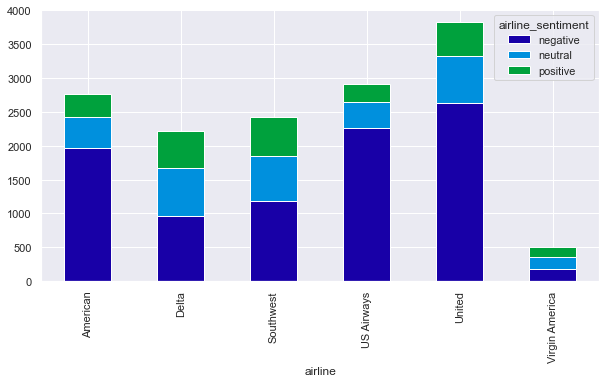

In [571]:
#THIS PLOTS THE AIRLINE SENTIMENT COUNT OF EACH AIRLINE

stacked_plot(tweets["airline"])

* All airlines recieved more negative tweets than neutral and positive tweets 

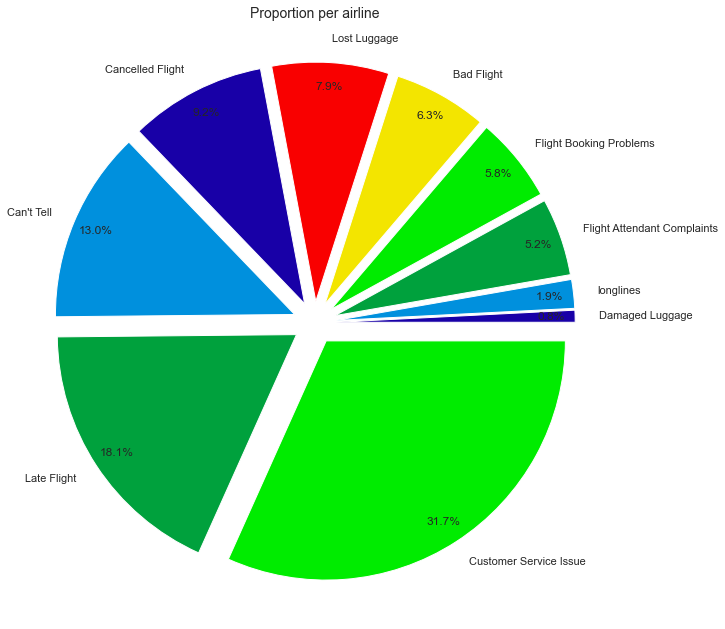

In [572]:
#THIS PLOTS ALL THE NEGATIVE REASONS ACROSS ALL AIRLINES

#Using matplotlib
Category=tweets['negativereason'].value_counts().sort_values()
pie, ax = plt.subplots(figsize=[20,11])
labels = Category.keys()
plt.pie(x=Category, autopct="%.1f%%", explode=[0.09]*10, labels=labels, pctdistance=0.9)
plt.title("Proportion per airline", fontsize=14);
#pie.savefig("DeliveryPieChart.png")

* Customer service was the biggest issue with 31.7%, late flights with 18.1%, Can't tell 13.0%

In [573]:
## Function to plot stacked bar chart

def stacked_plot2(x):
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, tweets["negativereason"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, tweets["negativereason"])
    tab.plot(kind="bar", stacked=True, figsize=(12, 7))
    plt.legend(loc='lower left', frameon=True)
    plt.legend(loc="lower right", bbox_to_anchor=(1,1.1))
    plt.show()

negativereason  Bad Flight  Can't Tell  Cancelled Flight  \
airline                                                    
American                87         198               246   
Delta                   64         186                51   
Southwest               90         159               162   
US Airways             104         246               189   
United                 216         379               181   
Virgin America          19          22                18   
All                    580        1190               847   

negativereason  Customer Service Issue  Damaged Luggage  \
airline                                                   
American                           768               12   
Delta                              199               11   
Southwest                          391               14   
US Airways                         811               11   
United                             681               22   
Virgin America                      60        

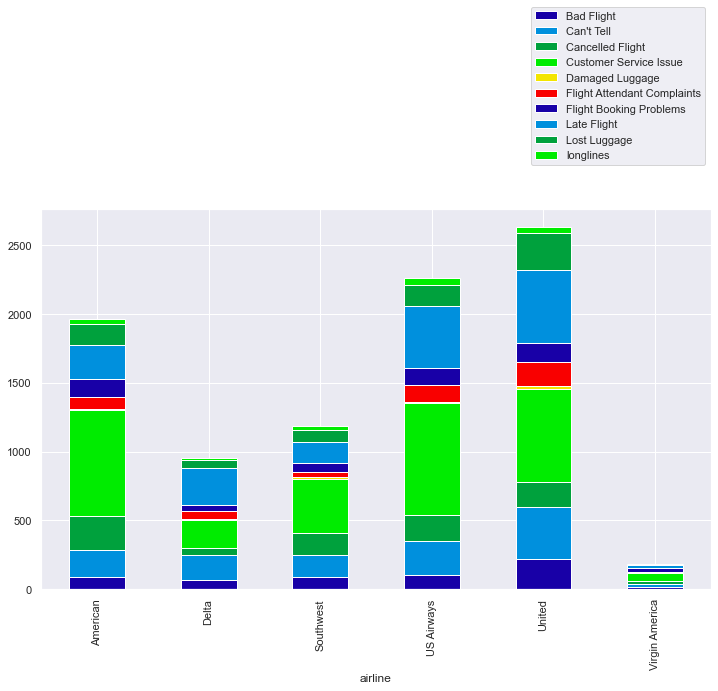

In [574]:
#THIS PLOTS THE NEGATIVE REASONS COUNT ACROSS EACH AIRLINE

stacked_plot2(tweets["airline"])

In [575]:
#THIS SEPERATES THE NEGATIVE AND POSITIVES TWEETS 

Positive_sent = tweets[tweets['airline_sentiment']=='positive']
Negative_sent = tweets[tweets['airline_sentiment']=='negative']

In [576]:
print('Number of tweets with positive sentiment', Positive_sent['airline_sentiment'].count())
print('Number of tweets with negative sentiment', Negative_sent['airline_sentiment'].count())

Number of tweets with positive sentiment 2363
Number of tweets with negative sentiment 9178


In [577]:
#FUNCTION TO CREATE A WORDCLOUD

def show_wordcloud(tweets, title):
    text = ' '.join(tweets['text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

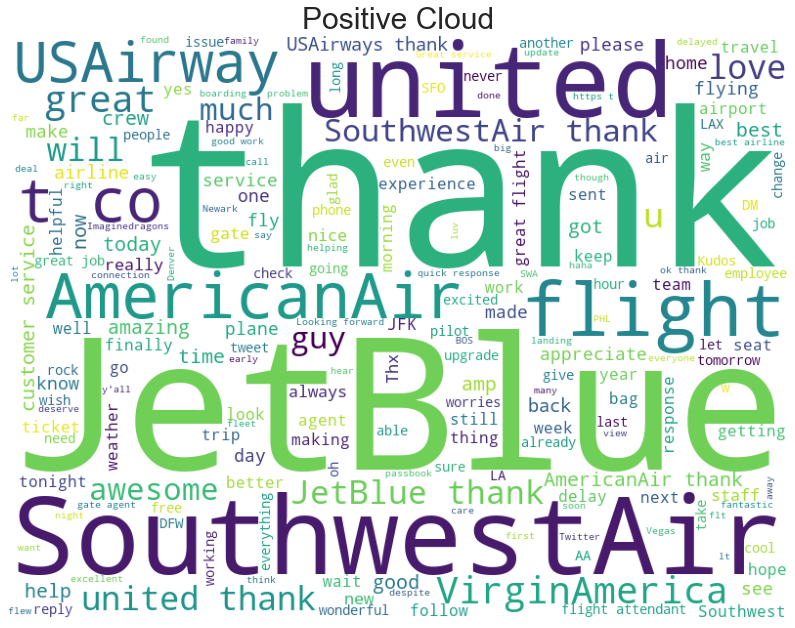

In [578]:
#THIS PRINTS A WORDCLOUD OF THE POSITIVE TWEETS

show_wordcloud(Positive_sent, "Positive Cloud")

* Common positive words: awesome, love, thank, great, good, wonderful, nice 

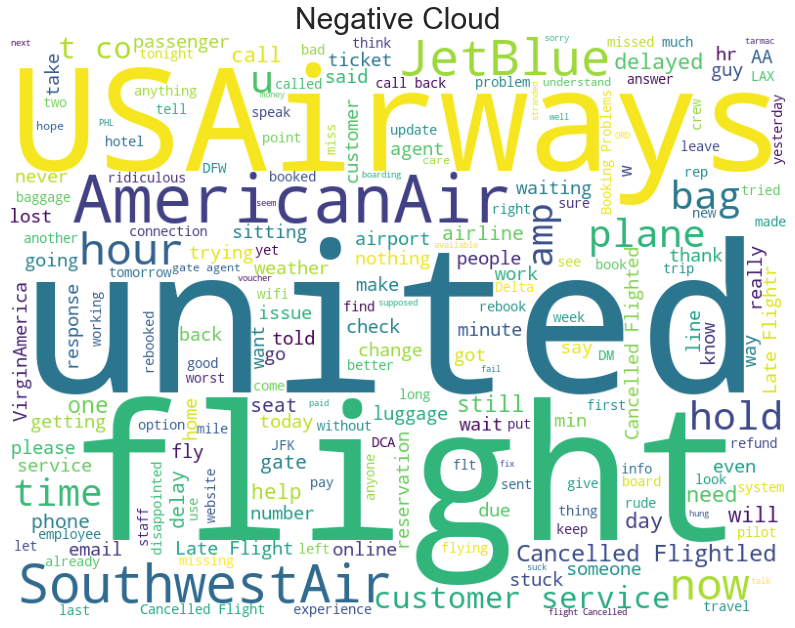

In [579]:
#THIS PRINTS A WORDCLOUD OF THE NEGATIVE TWEETS

show_wordcloud(Negative_sent, "Negative Cloud")

* Common negative words: cancelled, late, delayed, refund, stranded, problem

## Understand of data columns: 
    
    a. Drop all other columns except “text” and “airline_sentiment”.
    
    b. Check the shape of the data.
    
    c. Print the first 5 rows of data.

In [580]:
#DROPPING EVERY COLUMN EXCEPT FOR "TEXT" AND "AIRLINE_SENTIMENT"

tweets0= tweets[['text', 'airline_sentiment']].copy()

In [581]:
#CHECKS THE SHAPE OF DATA

tweets0.shape

(14640, 2)

* We have successfully dropped all colmuns except for text and airline_sentiment 

In [582]:
#THIS PRINTS OUT FIRST 5 ROWS 

tweets0.head(5)

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


# Text pre-processing: Data preparation. 
     
     a. Html tag removal.
     b. Tokenization.
     c. Remove the numbers.
     d. Removal of Special Characters and Punctuations.
     e. Removal of stopwords
     f. Conversion to lowercase.
     g. Lemmatize or stemming.
     h. Join the words in the list to convert back to text string in the data frame. (So that each row
          contains the data in text format.)
     i. Print the first 5 rows of data after pre-processing.
     

In [583]:
#THIS REMOVES HTML TAGS

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

#ONLY NEED PROCESS "TEXT" SINCE "AIRLINE_SENTIMENT" IS ONLY COMPRISED OF: NEGATIVE, NEUTRAL, POSITIVE

tweets0['text'] = tweets0['text'].apply(lambda x: strip_html(x))


tweets0.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [584]:
#THIS REPLACES CONTRACTIONS 

def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

#ONLY NEED PROCESS "TEXT" SINCE "AIRLINE_SENTIMENT" IS ONLY COMPRISED OF: NEGATIVE, NEUTRAL, POSITIVE 

tweets0['text'] = tweets0['text'].apply(lambda x: replace_contractions(x))

tweets0.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials...,positive
2,@VirginAmerica I did not today... Must mean I ...,neutral
3,@VirginAmerica it is really aggressive to blas...,negative
4,@VirginAmerica and it is a really big bad thin...,negative


In [585]:
#THIS REMOVES ANY NUMBERS FROM TEXT

def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

#ONLY NEED PROCESS "TEXT" SINCE "AIRLINE_SENTIMENT" IS ONLY COMPRISED OF: NEGATIVE, NEUTRAL, POSITIVE 

tweets0['text'] = tweets0['text'].apply(lambda x: remove_numbers(x))


tweets0.head()


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials...,positive
2,@VirginAmerica I did not today... Must mean I ...,neutral
3,@VirginAmerica it is really aggressive to blas...,negative
4,@VirginAmerica and it is a really big bad thin...,negative


In [586]:
#THIS IS USED TO TOKENIZE THE DATA

tweets0['text'] = tweets0.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) 

tweets0.head()

,text,airline_sentiment
0,"[@, VirginAmerica, What, @, dhepburn, said, .]",neutral
1,"[@, VirginAmerica, plus, you, have, added, com...",positive
2,"[@, VirginAmerica, I, did, not, today, ..., Mu...",neutral
3,"[@, VirginAmerica, it, is, really, aggressive,...",negative
4,"[@, VirginAmerica, and, it, is, a, really, big...",negative


In [587]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))  

NOTE:- Each text pre-processing step should be mentioned in the notebook separately.
     
     a. Html tag removal.
     b. Tokenization.
     c. Remove the numbers.
     d. Removal of Special Characters and Punctuations.
     e. Removal of stopwords
     f. Conversion to lowercase.
     g. Lemmatize or stemming.
     h. Join the words in the list to convert back to text string in the data frame. (So that each row
          contains the data in text format.)
     i. Print the first 5 rows of data after pre-processing.
     

In [588]:
#PRE-PROCESSING CONT. 

lemmatizer = WordNetLemmatizer()

#REMOVES NON-ASCII CHARACTERS

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

#CONVERTS ALL UPPER CASE TO LOWER CASE

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

#REMOVES PUNCTATION

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

#REMOVES STOPWORDS

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

#LEMMATIZE

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

tweets0['text'] = tweets0.apply(lambda row: normalize(row['text']), axis=1)
tweets0.head()

,text,airline_sentiment
0,virginamerica dhepburn say,neutral
1,virginamerica plus add commercials experience ...,positive
2,virginamerica not today must mean need take an...,neutral
3,virginamerica really aggressive blast obnoxiou...,negative
4,virginamerica really big bad thing,negative


## Vectorization:
   
    a. Use CountVectorizer.
    
    b. Use TfidfVectorizer.

In [589]:
#VECTORIZATION (CONVERTS TEXT DATA TO NUMBERS)


bow_vec = CountVectorizer(max_features=2000)                # Keep only 2000 features as number of features will increase the processing time.
data_features1 = bow_vec.fit_transform(tweets0['text'])

data_features1 = data_features1.toarray()                        # Convert the data features to array.


In [590]:
#MAKING A COPY OF AIRLINE_SENTIMENT

airline_sentiment1 = tweets0['airline_sentiment']
airline_sentiment2 = tweets0['airline_sentiment']

In [591]:
#PRINTS THE DATA ARRAYS

print(data_features)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [592]:
#TFID VECTORIZER

vectorizer = TfidfVectorizer(max_features=2000)
data_features2 = vectorizer.fit_transform(tweets0['text'])

data_features2 = data_features2.toarray()


print(data_features2)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Fitting, Tuning, Optimizing, and Evaluating Models using both types of Vectorization. 

Print the top 40 features and plot their word cloud using both types of vectorization. 

In [593]:
#SPLITTING DATA INTO TRAINING AND TESTING SET 

X_train1, X_test1, y_train1, y_test1 = train_test_split(data_features1, airline_sentiment1, test_size=0.3, random_state=42)

In [594]:
#RANDOM FORREST CLASSIFIER 

forest1 = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest1 = forest.fit(X_train1, y_train1)

print(forest1)

print(np.mean(cross_val_score(forest1, data_features1, airline_sentiment1, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7192622950819672


## Optimizing the parameter: Number of trees in the random forest model(n_estimators)

In [595]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]
base_ln

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [596]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train1, y_train1, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

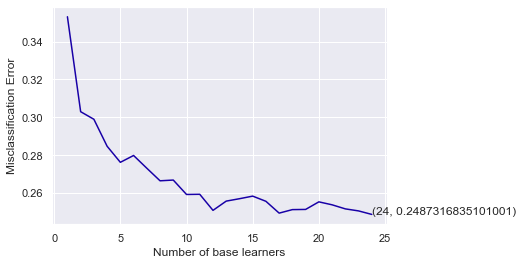

In [597]:
#PLOTTING THE ERROR AS K INCREASES 

error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [598]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train1, y_train1)
clf.score(X_test1, y_test1)

0.7686703096539163

In [599]:
#Saving result of Random Forest using Vectorization

result1 =  clf.predict(X_test1) 


In [600]:

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

[[2527  219   68]
 [ 370  438   76]
 [ 171  112  411]]


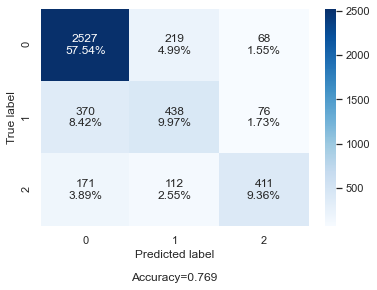

In [601]:
#Confusion matrix and heat map

conf_mat = confusion_matrix(y_test1, result1)

print(conf_mat)


cm3=confusion_matrix(y_test1, result1)
labels = 'auto'
categories = 'auto'
make_confusion_matrix(cm3, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

* Random Forest with CountVectorizer = accuracy of 0.769

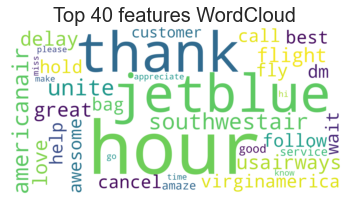

In [612]:
#PRINTING TOP 40 WORD CLOUD FOR RANDOM FOREST WITH VECTORIZATION

all_features = bow_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
    
    

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()



In [ ]:
#REPEATING PROCESS FOR TFID VECTORIZER 

In [602]:
# Split data into training and testing set.

X_train2, X_test2, y_train2, y_test2 = train_test_split(data_features2, airline_sentiment2, test_size=0.3, random_state=69)

In [603]:
#RANDOM FOREST 

forest2 = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest2 = forest.fit(X_train2, y_train2)

print(forest2)

print(np.mean(cross_val_score(forest2, data_features2, airline_sentiment2, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.721448087431694


In [604]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]
base_ln

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [605]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train2, y_train2, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

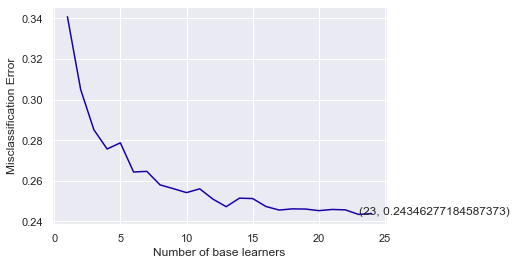

In [606]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [607]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train2, y_train2)
clf.score(X_test2, y_test2)

0.7675318761384335

In [608]:
#Saving result of Random Forest using TfidVectorizer

result2 =  clf.predict(X_test2) 

[[2578  130   47]
 [ 466  400   67]
 [ 206  105  393]]


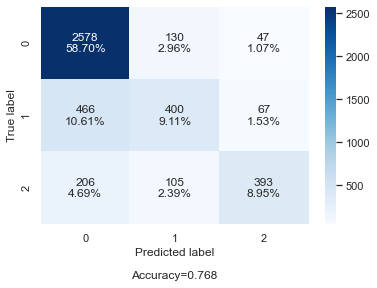

In [609]:
#Confusion matrix and heat map

conf_mat = confusion_matrix(y_test2, result2)

print(conf_mat)


cm3=confusion_matrix(y_test2, result2)
labels = 'auto'
categories = 'auto'
make_confusion_matrix(cm3, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

* Random Forest with TFID VECTORIZER = accuracy of 0.768

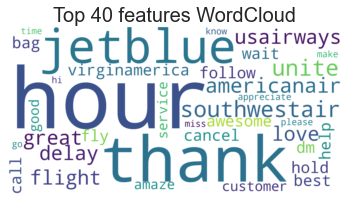

In [614]:
#PRINTING WORD CLOUD FOR FOR RANDOM FOREST WITH TFID VECTORIZER


all_features = bow_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
    

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()




## Summary  

Summarize your understanding of the application of Various Pre-processing and Vectorization and
    the performance of your model on this dataset.
    
* This project was analyzing tweets from clients and evaluating classifying them as negative, neutral, or negative. This is important to companies so that they can analze the overall sentiment across social media. Companies can gain great insight on what types of problems their customers are dissatified with or where they are getting good feedback. 

* The objective of this project analyze the text and create a model to clasify the tweets. 

* Before doing this EDA was performed to gain some insight on the data. For example:
    * All airlines recieved more negative tweets than neutral and positive tweets 
    * The top 3 negative reasons were Customer service 31.7%, late flights  18.1%, Can't tell 13.0%

* For the model we only used the text feature and the airline_sentiment feature to classify the tweets all other columns were dropped

* Then the data was pre-processed this is important so that the model can interpert the language of the text correctly. These steps included: 
    
    a. Html tag removal.
    
    b. Tokenization.
    
    c. Remove the numbers.
    
    d. Removal of Special Characters and Punctuations.
    
    e. Removal of stopwords
    
    f. Conversion to lowercase.
    
    g. Lemmatize or stemming.
    
    h. Join the words in the list to convert back to text string in the data frame. 

* Two forms of vectorization were used for the Random Forest Classifier      

    a. CountVectorizer.
    
    b. TfidfVectorizer.

* Both models produced very similar numbers with CountVectorizer = 0.769 and TfidfVectorizer = 0.768 

* The models can be improved by adjusting hyperparamters. 